In [46]:
# Chandler Jenkins
# 4236753
# march 9th 2025

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Step 1: Load the dataset
# Assuming you downloaded the dataset and placed it in the correct directory
df = pd.read_csv('bank_marketing.csv', sep=';')


In [51]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [52]:
# Step 2: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)


Categorical Columns:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [53]:
# Step 3: Convert categorical variables using Label Encoding
label_encoder = LabelEncoder()

In [54]:
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [55]:
print("\nData after Label Encoding:")
print(df)


Data after Label Encoding:
       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  ...

In [56]:
y = df['y']

# Features (X) are all columns except 'y'
X = df.drop(columns=['y'])

# Display the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (41188, 20)
Shape of y (target): (41188,)


In [57]:
# Step 4: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional, for better readability)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (32950, 20)
Shape of X_test: (8238, 20)
Shape of y_train: (32950,)
Shape of y_test: (8238,)


In [59]:
k_values = list(range(1, 31))  # Test K from 1 to 30
cv_scores = []  # List to store cross-validation scores

# Perform 5-fold cross-validation for each K value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())



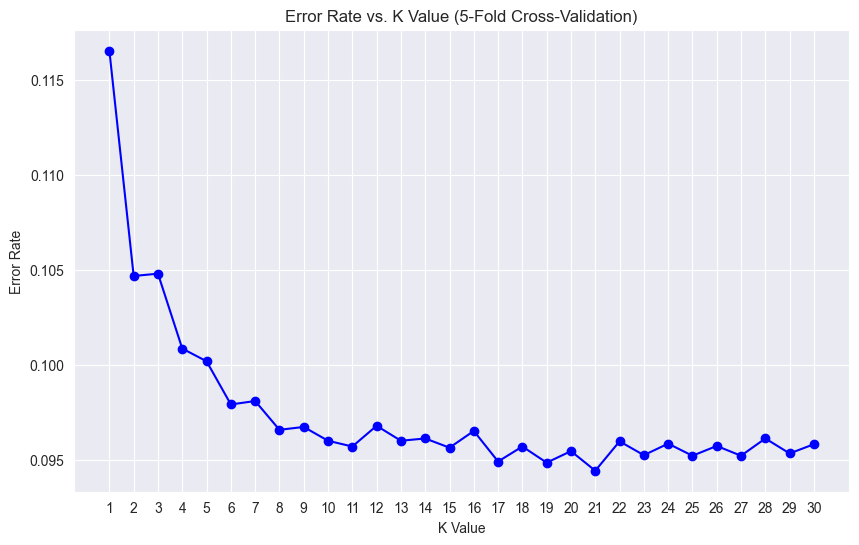

In [60]:
error_rates = [1 - score for score in cv_scores]

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='b')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value (5-Fold Cross-Validation)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [61]:
optimal_k = k_values[np.argmin(error_rates)]
min_error_rate = min(error_rates)

# Step 8: Print the optimal K and its corresponding error rate
print("Optimal K:", optimal_k)
print("Minimum Error Rate:", min_error_rate)

Optimal K: 21
Minimum Error Rate: 0.09441578148710161


In [62]:
# Step 9: Train the final KNN model with the optimal K
optimal_k = 7  # Replace with the optimal K you found earlier
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Train the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [63]:
# Step 10: Make predictions on the test set
y_pred = knn.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9007040543821316
